In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import functions as main
import numpy as np

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'functions'

# Transform cluttered data

#### Merge de todos os dados Macro num só CSV

In [2]:
from pathlib import Path
import glob

path = r"D:\OneDrive - Instituto Politecnico de Castelo Branco\002_Learning\001_Pos_Graduacao\Ciclo 5 - Projeto Final\ProjetoFinal-PosGraduacaoEngenhariaFinanceira\variables_data"
files = Path(path).glob('*.csv')  # .rglob to get subdirectories

dfs = []
for file in files:
    # Leitura do CSV
    data = pd.read_csv(file)
    
    # Ajuste do nome da coluna de datas para um nome consistente
    if 'DATE' in data.columns:
        data.rename(columns={'DATE': 'Date'}, inplace=True)
    
    if 'date' in data.columns:
        data.rename(columns={'date': 'Date'}, inplace=True)

    data["Date"] = pd.to_datetime(data.Date)

    # Definir a coluna de datas como índice
    data.set_index('Date', inplace=True)
    
    # Adicionar o DataFrame à lista
    dfs.append(data)

# Juntar todos os DataFrames usando o método "outer"
df = pd.concat(dfs, axis=1, join='outer')

C:\Users\Rui Caseiro\AppData\Local\Temp\ipykernel_13832\1644191010.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Date"] = pd.to_datetime(data.Date)
C:\Users\Rui Caseiro\AppData\Local\Temp\ipykernel_13832\1644191010.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Date"] = pd.to_datetime(data.Date)
C:\Users\Rui Caseiro\AppData\Local\Temp\ipykernel_13832\1644191010.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Date"] = pd.to_datetime(data.Date)


In [3]:
'''
Nr Transactions - soma
Nr Addresses - soma
BTC Page Views - soma

Hashrate - media
Mining_Difficulty - media
Nr_Tx_Block - media
'''


# Daily to Weekly



# mean variables because they're daily
mean_variables = ['Bitcoin_Wikipedia_Search', 'USD_OnChain_Volume', 'Nr_Addresses', 'Nr_Transactions', 'Miners_Revenue_USD' ]


# last value because they're trendy
last_variables = ['BTC_Supply', 'OIL_USD', 'VIX', 'Ten_YR_USA', 'TLT', 'GLD', 'QQQ', 
                  'Dollar_Index', 'M2_Liquidity', 'BTC_USD', 
                  'BalanceSheet_global', 'BalanceSheet_FED', 'HashRate', 'Mining_Difficulty']


#df_model[model1b]

df_to_resample = df.copy()


df_weekly_mean = (df_to_resample[mean_variables]).resample('W-FRI').mean() # close semanal à sexta feira

df_weekly_last = (df_to_resample[last_variables]).resample('W-FRI').last() # close semanal à sexta feira

In [4]:
df_weekly_mean

,Bitcoin_Wikipedia_Search,USD_OnChain_Volume,Nr_Addresses,Nr_Transactions,Miners_Revenue_USD
Date,,,,,
1947-01-03,NaN,NaN,NaN,NaN,NaN
1947-01-10,NaN,NaN,NaN,NaN,NaN
1947-01-17,NaN,NaN,NaN,NaN,NaN
1947-01-24,NaN,NaN,NaN,NaN,NaN
1947-01-31,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2073-12-01,NaN,NaN,NaN,NaN,NaN
2073-12-08,NaN,NaN,NaN,NaN,NaN
2073-12-15,NaN,NaN,NaN,NaN,NaN


In [13]:
df_weekly_last

(709, 14)

In [15]:
df_weekly_full = pd.merge(df_weekly_mean, df_weekly_last, left_index=True, right_index=True, how='outer')
df_weekly_full = df_weekly_full.reindex(sorted(df_weekly_full.columns), axis=1)
df_weekly_full = df_weekly_full.dropna()
df_weekly_full.shape

(706, 19)

In [16]:
df_weekly_full.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 706 entries, 2010-12-10 to 2024-06-28
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   BTC_Supply                706 non-null    float64
 1   BTC_USD                   706 non-null    float64
 2   BalanceSheet_FED          706 non-null    float64
 3   BalanceSheet_global       706 non-null    float64
 4   Bitcoin_Wikipedia_Search  706 non-null    float64
 5   Dollar_Index              706 non-null    float64
 6   GLD                       706 non-null    float64
 7   HashRate                  706 non-null    float64
 8   M2_Liquidity              706 non-null    float64
 9   Miners_Revenue_USD        706 non-null    float64
 10  Mining_Difficulty         706 non-null    float64
 11  Nr_Addresses              706 non-null    float64
 12  Nr_Transactions           706 non-null    float64
 13  OIL_USD                   706 non-null    floa

In [74]:
df_weekly_full.isna().sum()

BTC_Supply                  0
BTC_USD                     0
BalanceSheet_FED            0
BalanceSheet_global         0
Bitcoin_Wikipedia_Search    0
Dollar_Index                0
GLD                         0
HashRate                    0
M2_Liquidity                0
Miners_Revenue_USD          0
Mining_Difficulty           0
Nr_Addresses                0
Nr_Transactions             0
OIL_USD                     0
QQQ                         0
TLT                         0
Ten_YR_USA                  0
USD_OnChain_Volume          0
VIX                         0
dtype: int64

In [21]:
df_weekly_full.to_csv(f"df_weekly.csv", date_format='%Y-%m-%d', lineterminator='\n')

# Descriptive analysis

In [15]:
opencsv = pd.read_csv(r"D:\OneDrive - Instituto Politecnico de Castelo Branco\002_Learning\001_Pos_Graduacao\Ciclo 5 - Projeto Final\ProjetoFinal-PosGraduacaoEngenhariaFinanceira\df_weekly.csv", sep=",")
opencsv.set_index('Date', inplace=True)
opencsv.index = pd.to_datetime(opencsv.index)
opencsv = opencsv.asfreq(pd.infer_freq(opencsv.index))
opencsv = opencsv.astype(float)

In [16]:
opencsv

,BTC_Supply,BTC_USD,BalanceSheet_FED,BalanceSheet_global,Bitcoin_Wikipedia_Search,Dollar_Index,GLD,HashRate,M2_Liquidity,Miners_Revenue_USD,Mining_Difficulty,Nr_Addresses,Nr_Transactions,Nr_Tx_Block,OIL_USD,QQQ,TLT,Ten_YR_USA,USD_OnChain_Volume,VIX
Date,,,,,,,,,,,,,,,,,,,,
2010-12-17,4.905800e+06,0.240,2385754.0,11775.3249,3336.0,80.370003,134.199997,1.043216e-01,8848.4,1.562974e+04,1.225200e+04,5913.0,4127.0,3.490764,88.019997,48.208679,64.974373,3.330,4.916091e+04,16.110001
2010-12-24,4.963300e+06,0.248,2427921.0,11815.1288,3031.0,80.500000,134.660004,1.071203e-01,8857.2,1.638118e+04,1.320864e+04,5816.0,4321.0,3.790638,91.510002,48.403194,64.758339,3.393,7.735713e+04,16.469999
2010-12-31,5.020500e+06,0.300,2420570.0,11806.2939,2028.0,79.029999,138.720001,1.167447e-01,8874.8,1.615867e+04,1.448416e+04,5552.0,4066.0,3.560744,91.379997,48.155598,65.812241,3.305,4.826552e+04,17.750000
2011-01-07,5.076100e+06,0.320,2436064.0,11809.9985,1857.0,81.010002,133.580002,1.233310e-01,8888.5,1.704035e+04,1.578649e+04,5628.0,6359.0,5.816334,88.029999,49.402397,64.574562,3.328,3.779481e+04,17.139999
2011-01-14,5.136250e+06,0.400,2468131.0,11873.1060,1652.0,79.160004,132.690002,1.388521e-01,8887.3,2.113972e+04,1.630742e+04,8126.0,9023.0,7.518857,91.540001,50.401585,64.217964,3.333,9.660554e+04,15.460000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31,1.970619e+07,67482.250,7284319.0,23330.1818,19635.0,104.669998,215.300003,5.950375e+08,20792.2,2.299891e+08,8.438146e+13,3225344.0,4773411.0,4773.873394,76.989998,449.994751,89.557648,4.514,5.835479e+10,12.920000
2024-06-07,1.970922e+07,69330.510,7255687.0,23384.0579,18226.0,104.889999,211.600006,5.801599e+08,20949.1,2.527962e+08,8.422222e+13,3223101.0,4305939.0,4440.580418,75.529999,462.225311,90.906853,4.430,4.858871e+10,12.220000
2024-06-14,1.971237e+07,66006.130,7258974.0,23379.8425,16773.0,105.550003,215.729996,5.980781e+08,20979.1,2.499234e+08,8.371665e+13,3466316.0,4425784.0,4426.078012,78.449997,478.429565,94.056297,4.213,4.093236e+10,12.660000


In [ ]:
pd.set_option('float_format', '{:.3f}'.format)
descriptive_analysis = opencsv.describe().T
descriptive_analysis

In [ ]:
descriptive_analysis.to_csv("descriptive_analysis.csv")

In [ ]:
quotes_pct_ret_corr = opencsv.pct_change().dropna().corr()
quotes_pct_ret_corr

In [ ]:
quotes_pct_ret_corr.to_csv("correlation_matrix.csv")

In [ ]:
main.correlation_map(df=opencsv, threshold=0.3)

# Multiple Linear Regression data Prep

In [34]:
#csv = "df_weekly"

opencsv = pd.read_csv(r"D:\OneDrive - Instituto Politecnico de Castelo Branco\002_Learning\001_Pos_Graduacao\Ciclo 5 - Projeto Final\ProjetoFinal-PosGraduacaoEngenhariaFinanceira\df_weekly.csv", sep=",")
opencsv.set_index('Date', inplace=True)
opencsv.index = pd.to_datetime(opencsv.index)
opencsv = opencsv.asfreq(pd.infer_freq(opencsv.index))
opencsv = opencsv.astype(float)
#opencsv = opencsv.dropna()

In [29]:
opencsv.columns

Index(['BTC_Supply', 'BTC_USD', 'BalanceSheet_FED', 'BalanceSheet_global',
       'Bitcoin_Wikipedia_Search', 'Dollar_Index', 'GLD', 'HashRate',
       'M2_Liquidity', 'Miners_Revenue_USD', 'Mining_Difficulty',
       'Nr_Addresses', 'Nr_Transactions', 'OIL_USD', 'QQQ', 'TLT',
       'Ten_YR_USA', 'USD_OnChain_Volume', 'VIX'],
      dtype='object')

In [32]:
opencsv.shape

(4950, 19)

In [79]:
opencsv.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 706 entries, 2010-12-10 to 2024-06-28
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   BTC_Supply                706 non-null    float64
 1   BTC_USD                   706 non-null    float64
 2   BalanceSheet_FED          706 non-null    float64
 3   BalanceSheet_global       706 non-null    float64
 4   Bitcoin_Wikipedia_Search  706 non-null    float64
 5   Dollar_Index              706 non-null    float64
 6   GLD                       706 non-null    float64
 7   HashRate                  706 non-null    float64
 8   M2_Liquidity              706 non-null    float64
 9   Miners_Revenue_USD        706 non-null    float64
 10  Mining_Difficulty         706 non-null    float64
 11  Nr_Addresses              706 non-null    float64
 12  Nr_Transactions           706 non-null    float64
 13  OIL_USD                   706 non-null    floa

#### Periodic to cumulative

In [112]:
# mean variables because they're daily
mean_variables = ['Nr_Tx_Block', 'HashRate', 'Mining_Difficulty', 'Bitcoin_Wikipedia_Search', 
                  'USD_OnChain_Volume', 'Nr_Addresses', 'Nr_Transactions', 'Miners_Revenue_USD' ]


cumulative_df = opencsv.copy()

for col in cumulative_df.columns:
    if col in mean_variables:
        cumulative_df[col] = cumulative_df[col].cumsum()

#log_df = log_df.dropna()
#differenced_df = cumulative_df.iloc[1:]
cumulative_df

,BTC_Supply,BTC_USD,BalanceSheet_FED,BalanceSheet_global,Bitcoin_Wikipedia_Search,Dollar_Index,GLD,HashRate,M2_Liquidity,Miners_Revenue_USD,Mining_Difficulty,Nr_Addresses,Nr_Transactions,Nr_Tx_Block,OIL_USD,QQQ,TLT,Ten_YR_USA,USD_OnChain_Volume,VIX
Date,,,,,,,,,,,,,,,,,,,,
2010-12-10,4.846150e+06,0.204,2382294.0,11871.4208,5.028571e+01,80.070000,135.410004,9.399597e-02,8829.1,2.768796e+03,8.674453e+03,5.930000e+02,4.674286e+02,2.126063,87.790001,48.086807,64.911652,3.296,8.172630e+03,17.610001
2010-12-17,4.905800e+06,0.240,2385754.0,11775.3249,5.268571e+02,80.370003,134.199997,1.983176e-01,8848.4,5.001617e+03,2.092645e+04,1.437714e+03,1.057000e+03,5.616827,88.019997,48.208679,64.974373,3.330,1.519562e+04,16.110001
2010-12-24,4.963300e+06,0.248,2427921.0,11815.1288,9.598571e+02,80.500000,134.660004,3.054379e-01,8857.2,7.341785e+03,3.413509e+04,2.268571e+03,1.674286e+03,9.407465,91.510002,48.403194,64.758339,3.393,2.624663e+04,16.469999
2010-12-31,5.020500e+06,0.300,2420570.0,11806.2939,1.249571e+03,79.029999,138.720001,4.221826e-01,8874.8,9.650166e+03,4.861926e+04,3.061714e+03,2.255143e+03,12.968209,91.379997,48.155598,65.812241,3.305,3.314171e+04,17.750000
2011-01-07,5.076100e+06,0.320,2436064.0,11809.9985,1.514857e+03,81.010002,133.580002,5.455136e-01,8888.5,1.208450e+04,6.440575e+04,3.999714e+03,3.163571e+03,18.784542,88.029999,49.402397,64.574562,3.328,3.854097e+04,17.139999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31,1.970619e+07,67482.250,7284319.0,23330.1818,5.717270e+06,104.669998,215.300003,6.362161e+10,20792.2,9.447970e+09,8.752712e+15,2.805526e+08,1.450438e+08,982740.006154,76.989998,449.994751,89.557648,4.514,1.046245e+12,12.920000
2024-06-07,1.970922e+07,69330.510,7255687.0,23384.0579,5.719874e+06,104.889999,211.600006,6.420177e+10,20949.1,9.484084e+09,8.836934e+15,2.810130e+08,1.456590e+08,987180.586572,75.529999,462.225311,90.906853,4.430,1.053187e+12,12.220000
2024-06-14,1.971237e+07,66006.130,7258974.0,23379.8425,5.722270e+06,105.550003,215.729996,6.479985e+10,20979.1,9.519787e+09,8.920651e+15,2.815082e+08,1.462912e+08,991606.664584,78.449997,478.429565,94.056297,4.213,1.059034e+12,12.660000


In [113]:
opencsv

,BTC_Supply,BTC_USD,BalanceSheet_FED,BalanceSheet_global,Bitcoin_Wikipedia_Search,Dollar_Index,GLD,HashRate,M2_Liquidity,Miners_Revenue_USD,Mining_Difficulty,Nr_Addresses,Nr_Transactions,Nr_Tx_Block,OIL_USD,QQQ,TLT,Ten_YR_USA,USD_OnChain_Volume,VIX
Date,,,,,,,,,,,,,,,,,,,,
2010-12-10,4.846150e+06,0.204,2382294.0,11871.4208,50.285714,80.070000,135.410004,9.399597e-02,8829.1,2.768796e+03,8.674453e+03,593.000000,467.428571,2.126063,87.790001,48.086807,64.911652,3.296,8.172630e+03,17.610001
2010-12-17,4.905800e+06,0.240,2385754.0,11775.3249,476.571429,80.370003,134.199997,1.043216e-01,8848.4,2.232821e+03,1.225200e+04,844.714286,589.571429,3.490764,88.019997,48.208679,64.974373,3.330,7.022987e+03,16.110001
2010-12-24,4.963300e+06,0.248,2427921.0,11815.1288,433.000000,80.500000,134.660004,1.071203e-01,8857.2,2.340168e+03,1.320864e+04,830.857143,617.285714,3.790638,91.510002,48.403194,64.758339,3.393,1.105102e+04,16.469999
2010-12-31,5.020500e+06,0.300,2420570.0,11806.2939,289.714286,79.029999,138.720001,1.167447e-01,8874.8,2.308381e+03,1.448416e+04,793.142857,580.857143,3.560744,91.379997,48.155598,65.812241,3.305,6.895074e+03,17.750000
2011-01-07,5.076100e+06,0.320,2436064.0,11809.9985,265.285714,81.010002,133.580002,1.233310e-01,8888.5,2.434336e+03,1.578649e+04,938.000000,908.428571,5.816334,88.029999,49.402397,64.574562,3.328,5.399258e+03,17.139999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31,1.970619e+07,67482.250,7284319.0,23330.1818,2805.000000,104.669998,215.300003,5.950375e+08,20792.2,3.285559e+07,8.438146e+13,460763.428571,681915.857143,4773.873394,76.989998,449.994751,89.557648,4.514,8.336398e+09,12.920000
2024-06-07,1.970922e+07,69330.510,7255687.0,23384.0579,2603.714286,104.889999,211.600006,5.801599e+08,20949.1,3.611374e+07,8.422222e+13,460443.000000,615134.142857,4440.580418,75.529999,462.225311,90.906853,4.430,6.941244e+09,12.220000
2024-06-14,1.971237e+07,66006.130,7258974.0,23379.8425,2396.142857,105.550003,215.729996,5.980781e+08,20979.1,3.570334e+07,8.371665e+13,495188.000000,632254.857143,4426.078012,78.449997,478.429565,94.056297,4.213,5.847481e+09,12.660000


### Normality Tests

Text(0.5, 1.0, 'Distribution of Bitcoin returns in $log$ scale')

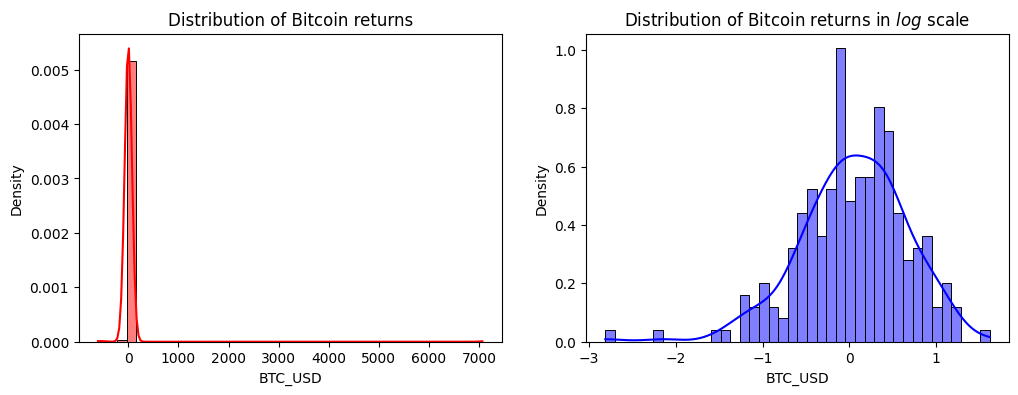

In [6]:
import seaborn as sns

btc_returns = opencsv["BTC_USD"].pct_change().dropna()
btc_log_returns = np.log10(opencsv["BTC_USD"]).diff().dropna()

f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.histplot(btc_returns,bins=40,color='r',ax=ax, kde=True, stat='density')
ax.set_title('Distribution of Bitcoin returns')

ax=f.add_subplot(122)
sns.histplot(btc_log_returns,bins=40,color='b',ax=ax, kde=True, stat='density')
ax.set_title('Distribution of Bitcoin returns in $log$ scale')

#### Box -Cox transformation

A Box Cox transformation is a way to transform non-normal dependent variables into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn’t normal, applying a Box-Cox means that you are able to run a broader number of tests. All that we need to perform this transformation is to find lambda value and apply the rule shown below to your variable.  
$$\mathbf{ \begin {cases}\frac {y^\lambda - 1}{\lambda},& y_i\neg=0 \\
 log(y_i) & \lambda = 0 \end{cases}}$$
 The trick of Box-Cox transformation is to find lambda value, however in practice this is quite affordable. The following function returns the transformed variable, lambda value,confidence interval

In [ ]:
from scipy.stats import boxcox
BTC_USD_BoxCox,lam, ci= boxcox(opencsv["BTC_USD"],alpha=0.05)

ci,lam

In [ ]:
import seaborn as sns

# Convert numpy array to a DataFrame
BTC_USD_BoxCox_df = pd.DataFrame(BTC_USD_BoxCox, index=opencsv.index, columns=["BTC_USD_BoxCox"])

btc_BoxCox_returns = BTC_USD_BoxCox_df["BTC_USD_BoxCox"].pct_change().dropna()

f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.histplot(btc_returns,bins=40,color='r',ax=ax, kde=True, stat='density')
ax.set_title('Distribution of Bitcoin returns')

ax=f.add_subplot(122)
sns.histplot(btc_BoxCox_returns,bins=40,color='b',ax=ax, kde=True, stat='density')
ax.set_title('Distribution of Bitcoin Box Cox returns')

### Winsorozation

In [80]:
from scipy.stats.mstats import winsorize

winsorized_df = opencsv.copy()

winsorized_df = winsorized_df.apply(lambda col: winsorize(col, (0.01, 0.01)))
winsorized_df.head()

,BTC_Supply,BTC_USD,BalanceSheet_FED,BalanceSheet_global,Bitcoin_Wikipedia_Search,Dollar_Index,GLD,HashRate,M2_Liquidity,Miners_Revenue_USD,Mining_Difficulty,Nr_Addresses,Nr_Transactions,OIL_USD,QQQ,TLT,Ten_YR_USA,USD_OnChain_Volume,VIX
Date,,,,,,,,,,,,,,,,,,,
2010-12-10,5254200.0,0.446,2468131.0,11871.4208,433.000000,80.070000,135.410004,0.178361,8886.0,3695.691992,22012.381338,1389.714286,1283.428571,87.790001,48.086807,64.911652,3.296,27730.080474,17.610001
2010-12-17,5254200.0,0.446,2468131.0,11857.2285,476.571429,80.370003,134.199997,0.178361,8886.0,3695.691992,22012.381338,1389.714286,1283.428571,88.019997,48.208679,64.974373,3.330,27730.080474,16.110001
2010-12-24,5254200.0,0.446,2468131.0,11857.2285,433.000000,80.500000,134.660004,0.178361,8886.0,3695.691992,22012.381338,1389.714286,1283.428571,91.510002,48.403194,64.758339,3.393,27730.080474,16.469999
2010-12-31,5254200.0,0.446,2468131.0,11857.2285,433.000000,79.029999,138.720001,0.178361,8886.0,3695.691992,22012.381338,1389.714286,1283.428571,91.379997,48.155598,65.812241,3.305,27730.080474,17.750000
2011-01-07,5254200.0,0.446,2468131.0,11857.2285,433.000000,81.010002,133.580002,0.178361,8888.5,3695.691992,22012.381338,1389.714286,1283.428571,88.029999,49.402397,64.574562,3.328,27730.080474,17.139999


In [43]:
winsorized_df.shape

(706, 19)

### Log Df

In [81]:
# transformacao logaritcmica de todas as colunas
log_df = winsorized_df.copy()

log_df = np.log10(log_df) 

In [45]:
log_df

,Bitcoin_Wikipedia_Search,USD_OnChain_Volume,Nr_Addresses,Nr_Transactions,Miners_Revenue_USD,BTC_Supply,OIL_USD,VIX,Ten_YR_USA,TLT,GLD,QQQ,Dollar_Index,M2_Liquidity,BTC_USD,BalanceSheet_global,BalanceSheet_FED,HashRate,Mining_Difficulty
Date,,,,,,,,,,,,,,,,,,,
2010-12-10,2.636488,4.442951,3.142926,3.108372,3.567696,6.720507,1.943445,1.245759,0.517987,1.812323,2.131651,1.682026,1.903470,3.948706,-0.350665,4.074503,6.392368,-0.748699,4.342667
2010-12-17,2.678128,4.442951,3.142926,3.108372,3.567696,6.720507,1.944581,1.207096,0.522444,1.812742,2.127753,1.683125,1.905094,3.948706,-0.350665,4.073983,6.392368,-0.748699,4.342667
2010-12-24,2.636488,4.442951,3.142926,3.108372,3.567696,6.720507,1.961469,1.216694,0.530584,1.811296,2.129239,1.684874,1.905796,3.948706,-0.350665,4.073983,6.392368,-0.748699,4.342667
2010-12-31,2.636488,4.442951,3.142926,3.108372,3.567696,6.720507,1.960851,1.249198,0.519171,1.818307,2.142139,1.682647,1.897792,3.948706,-0.350665,4.073983,6.392368,-0.748699,4.342667
2011-01-07,2.636488,4.442951,3.142926,3.108372,3.567696,6.720507,1.944631,1.234011,0.522183,1.810061,2.125741,1.693748,1.908539,3.948828,-0.350665,4.073983,6.392368,-0.748699,4.342667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31,3.447933,9.920978,5.663478,5.768712,7.516609,7.294392,1.886434,1.111263,0.654562,1.952103,2.333044,2.649015,2.019822,4.317900,4.827100,4.367626,6.862389,8.786450,13.924010
2024-06-07,3.415593,9.841437,5.663176,5.768712,7.557672,7.294392,1.878119,1.087071,0.646404,1.958597,2.325516,2.649015,2.020734,4.321165,4.827100,4.367626,6.860679,8.771546,13.922812
2024-06-14,3.379513,9.766969,5.694770,5.768712,7.552709,7.294392,1.894593,1.102434,0.624591,1.973388,2.333044,2.649015,2.023458,4.321787,4.819584,4.367626,6.860875,8.726468,13.922812


In [46]:
log_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 706 entries, 2010-12-10 to 2024-06-28
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Bitcoin_Wikipedia_Search  706 non-null    float64
 1   USD_OnChain_Volume        706 non-null    float64
 2   Nr_Addresses              706 non-null    float64
 3   Nr_Transactions           706 non-null    float64
 4   Miners_Revenue_USD        706 non-null    float64
 5   BTC_Supply                706 non-null    float64
 6   OIL_USD                   706 non-null    float64
 7   VIX                       706 non-null    float64
 8   Ten_YR_USA                706 non-null    float64
 9   TLT                       706 non-null    float64
 10  GLD                       706 non-null    float64
 11  QQQ                       706 non-null    float64
 12  Dollar_Index              706 non-null    float64
 13  M2_Liquidity              706 non-null    floa

In [82]:
log_df.isna().sum()

BTC_Supply                  0
BTC_USD                     0
BalanceSheet_FED            0
BalanceSheet_global         0
Bitcoin_Wikipedia_Search    0
Dollar_Index                0
GLD                         0
HashRate                    0
M2_Liquidity                0
Miners_Revenue_USD          0
Mining_Difficulty           0
Nr_Addresses                0
Nr_Transactions             0
OIL_USD                     0
QQQ                         0
TLT                         0
Ten_YR_USA                  0
USD_OnChain_Volume          0
VIX                         0
dtype: int64

In [83]:
log_df.to_csv(f"df_log_weekly.csv", date_format='%Y-%m-%d')

### Continuous data differencing

In [104]:
# Transformar a last para first difference

# Now that we have prepared the dataset we can start with the actual analysis. 
# The first stage is to generate a set of changes or differences for each of the variables, 
# since APT posits that the stock returns can be explained by reference to the unexpected changes 
# in the macroeconomic variables rather than their levels.

# need to be differenced because they're trendy
last_variables = ['BTC_Supply', 'OIL_USD', 'VIX', 'Ten_YR_USA', 'TLT', 'GLD', 'QQQ', 
                  'Dollar_Index', 'M2_Liquidity', 'BTC_USD', 
                  'BalanceSheet_global', 'BalanceSheet_FED']


differenced_df = opencsv.copy()

for col in differenced_df.columns:
    if col in last_variables:
        differenced_df[col] = differenced_df[col].diff(periods=1)

#log_df = log_df.dropna()
differenced_df = differenced_df.iloc[1:]
differenced_df

,BTC_Supply,BTC_USD,BalanceSheet_FED,BalanceSheet_global,Bitcoin_Wikipedia_Search,Dollar_Index,GLD,HashRate,M2_Liquidity,Miners_Revenue_USD,Mining_Difficulty,Nr_Addresses,Nr_Transactions,Nr_Tx_Block,OIL_USD,QQQ,TLT,Ten_YR_USA,USD_OnChain_Volume,VIX
Date,,,,,,,,,,,,,,,,,,,,
2010-12-17,59650.000,0.036,3460.0,-96.0959,476.571429,0.300003,-1.210007,1.043216e-01,19.3,2.232821e+03,1.225200e+04,844.714286,589.571429,3.490764,0.229996,0.121872,0.062721,0.034,7.022987e+03,-1.500000
2010-12-24,57500.000,0.008,42167.0,39.8039,433.000000,0.129997,0.460007,1.071203e-01,8.8,2.340168e+03,1.320864e+04,830.857143,617.285714,3.790638,3.490005,0.194515,-0.216034,0.063,1.105102e+04,0.359999
2010-12-31,57200.000,0.052,-7351.0,-8.8349,289.714286,-1.470001,4.059998,1.167447e-01,17.6,2.308381e+03,1.448416e+04,793.142857,580.857143,3.560744,-0.130005,-0.247597,1.053902,-0.088,6.895074e+03,1.280001
2011-01-07,55600.000,0.020,15494.0,3.7046,265.285714,1.980003,-5.139999,1.233310e-01,13.7,2.434336e+03,1.578649e+04,938.000000,908.428571,5.816334,-3.349998,1.246799,-1.237679,0.023,5.399258e+03,-0.610001
2011-01-14,60150.000,0.080,32067.0,63.1075,236.000000,-1.849998,-0.889999,1.388521e-01,-1.2,3.019961e+03,1.630742e+04,1160.857143,1289.000000,7.518857,3.510002,0.999187,-0.356598,0.005,1.380079e+04,-1.679999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31,3103.125,-1066.080,-15247.0,-5.0374,2805.000000,-0.050003,-0.619995,5.950375e+08,-50.3,3.285559e+07,8.438146e+13,460763.428571,681915.857143,4773.873394,-0.730003,-7.228546,-0.920830,0.047,8.336398e+09,0.990000
2024-06-07,3031.250,1848.260,-28632.0,53.8761,2603.714286,0.220001,-3.699997,5.801599e+08,156.9,3.611374e+07,8.422222e+13,460443.000000,615134.142857,4440.580418,-1.459999,12.230560,1.349205,-0.084,6.941244e+09,-0.700000
2024-06-14,3143.750,-3324.380,3287.0,-4.2154,2396.142857,0.660004,4.129990,5.980781e+08,30.0,3.570334e+07,8.371665e+13,495188.000000,632254.857143,4426.078012,2.919998,16.204254,3.149445,-0.217,5.847481e+09,0.440000


In [106]:
differenced_df.isna().sum()

BTC_Supply                  0
BTC_USD                     0
BalanceSheet_FED            0
BalanceSheet_global         0
Bitcoin_Wikipedia_Search    0
Dollar_Index                0
GLD                         0
HashRate                    0
M2_Liquidity                0
Miners_Revenue_USD          0
Mining_Difficulty           0
Nr_Addresses                0
Nr_Transactions             0
Nr_Tx_Block                 0
OIL_USD                     0
QQQ                         0
TLT                         0
Ten_YR_USA                  0
USD_OnChain_Volume          2
VIX                         0
dtype: int64

In [107]:
differenced_df.to_csv(f"df_differenced_weekly.csv", date_format='%Y-%m-%d')

### Rate of change

In [73]:
roc_df = differenced_df.copy()

roc_df = roc_df.pct_change(periods=1)
roc_df = roc_df.iloc[1:]
roc_df

,BTC_Supply,BTC_USD,BalanceSheet_FED,BalanceSheet_global,Bitcoin_Wikipedia_Search,Dollar_Index,GLD,HashRate,M2_Liquidity,Miners_Revenue_USD,Mining_Difficulty,Nr_Addresses,Nr_Transactions,Nr_Tx_Block,OIL_USD,QQQ,TLT,Ten_YR_USA,USD_OnChain_Volume,VIX
Date,,,,,,,,,,,,,,,,,,,,
2010-12-31,-0.005217,5.500000,-1.174331,-1.221961,-0.330914,-12.307941,7.825953,0.089847,1.000000,-0.013583,0.096567,-0.045392,-0.059014,-0.060648,-1.037251,-2.272891,-5.878408,-0.025936,-0.376069,2.555570
2011-01-07,-0.027972,-0.615385,-3.107740,-1.419314,-0.084320,-2.346940,-2.266010,0.056416,-0.221591,0.054564,0.089914,0.013689,0.563945,0.633460,24.768251,-6.035605,-2.174378,0.006959,-0.216940,-1.476563
2011-01-14,0.081835,3.000000,1.069640,16.034903,-0.110393,-1.934341,-0.826848,0.125849,-1.087591,0.240569,0.032999,0.443852,0.418934,0.292714,-2.047762,-0.198598,-0.711882,0.001502,1.556053,1.754095
2011-01-21,-0.017456,-0.751250,-2.339913,-1.309759,-0.039952,-0.486484,0.865174,0.128743,-20.000000,0.127983,0.130629,0.055132,-0.274299,-0.259767,-1.692307,-2.168136,-0.372625,0.024902,-0.053431,-2.791667
2011-01-28,-0.004230,0.311558,-1.427374,0.264128,-0.017654,-0.915788,-0.548194,0.044799,-6.267544,0.084906,0.055395,0.134593,0.166463,0.164607,-1.094648,-1.037870,-2.250175,-0.025468,3.185059,-0.478405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31,-0.061437,-1.712154,2.239907,-0.579105,-0.050807,-1.185194,-0.919897,-0.051308,-2.612179,-0.056746,0.011104,-0.033779,0.114789,0.188877,-0.688032,-2.169629,92.057055,0.010522,0.193653,-17.500143
2024-06-07,-0.023162,-2.733697,0.877878,-11.695220,-0.071760,-5.399756,4.967784,-0.025003,-4.119284,0.099166,-0.001887,-0.000695,-0.097932,-0.069816,0.999990,-2.691981,-2.465206,-0.018609,-0.167357,-1.707071
2024-06-14,0.037113,-2.798654,-1.114802,-1.078242,-0.079721,2.000000,-2.116214,0.030885,-0.808795,-0.011364,-0.006003,0.075460,0.027832,-0.003266,-3.000000,0.324899,1.334297,-0.048984,-0.157575,-1.628571


In [64]:
roc_df.isnull().sum()

BTC_Supply                  0
BTC_USD                     1
BalanceSheet_FED            0
BalanceSheet_global         0
Bitcoin_Wikipedia_Search    0
Dollar_Index                0
GLD                         0
HashRate                    0
M2_Liquidity                0
Miners_Revenue_USD          0
Mining_Difficulty           0
Nr_Addresses                0
Nr_Transactions             0
Nr_Tx_Block                 0
OIL_USD                     0
QQQ                         0
TLT                         0
Ten_YR_USA                  0
USD_OnChain_Volume          1
VIX                         0
dtype: int64

In [66]:
roc_df.isna().sum()

BTC_Supply                  0
BTC_USD                     1
BalanceSheet_FED            0
BalanceSheet_global         0
Bitcoin_Wikipedia_Search    0
Dollar_Index                0
GLD                         0
HashRate                    0
M2_Liquidity                0
Miners_Revenue_USD          0
Mining_Difficulty           0
Nr_Addresses                0
Nr_Transactions             0
Nr_Tx_Block                 0
OIL_USD                     0
QQQ                         0
TLT                         0
Ten_YR_USA                  0
USD_OnChain_Volume          1
VIX                         0
dtype: int64

In [74]:
# Interpolate to replace inf values
roc_df.replace([np.inf, -np.inf], np.nan, inplace=True)
roc_df.interpolate(method='linear', inplace=True)
roc_df

,BTC_Supply,BTC_USD,BalanceSheet_FED,BalanceSheet_global,Bitcoin_Wikipedia_Search,Dollar_Index,GLD,HashRate,M2_Liquidity,Miners_Revenue_USD,Mining_Difficulty,Nr_Addresses,Nr_Transactions,Nr_Tx_Block,OIL_USD,QQQ,TLT,Ten_YR_USA,USD_OnChain_Volume,VIX
Date,,,,,,,,,,,,,,,,,,,,
2010-12-31,-0.005217,5.500000,-1.174331,-1.221961,-0.330914,-12.307941,7.825953,0.089847,1.000000,-0.013583,0.096567,-0.045392,-0.059014,-0.060648,-1.037251,-2.272891,-5.878408,-0.025936,-0.376069,2.555570
2011-01-07,-0.027972,-0.615385,-3.107740,-1.419314,-0.084320,-2.346940,-2.266010,0.056416,-0.221591,0.054564,0.089914,0.013689,0.563945,0.633460,24.768251,-6.035605,-2.174378,0.006959,-0.216940,-1.476563
2011-01-14,0.081835,3.000000,1.069640,16.034903,-0.110393,-1.934341,-0.826848,0.125849,-1.087591,0.240569,0.032999,0.443852,0.418934,0.292714,-2.047762,-0.198598,-0.711882,0.001502,1.556053,1.754095
2011-01-21,-0.017456,-0.751250,-2.339913,-1.309759,-0.039952,-0.486484,0.865174,0.128743,-20.000000,0.127983,0.130629,0.055132,-0.274299,-0.259767,-1.692307,-2.168136,-0.372625,0.024902,-0.053431,-2.791667
2011-01-28,-0.004230,0.311558,-1.427374,0.264128,-0.017654,-0.915788,-0.548194,0.044799,-6.267544,0.084906,0.055395,0.134593,0.166463,0.164607,-1.094648,-1.037870,-2.250175,-0.025468,3.185059,-0.478405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31,-0.061437,-1.712154,2.239907,-0.579105,-0.050807,-1.185194,-0.919897,-0.051308,-2.612179,-0.056746,0.011104,-0.033779,0.114789,0.188877,-0.688032,-2.169629,92.057055,0.010522,0.193653,-17.500143
2024-06-07,-0.023162,-2.733697,0.877878,-11.695220,-0.071760,-5.399756,4.967784,-0.025003,-4.119284,0.099166,-0.001887,-0.000695,-0.097932,-0.069816,0.999990,-2.691981,-2.465206,-0.018609,-0.167357,-1.707071
2024-06-14,0.037113,-2.798654,-1.114802,-1.078242,-0.079721,2.000000,-2.116214,0.030885,-0.808795,-0.011364,-0.006003,0.075460,0.027832,-0.003266,-3.000000,0.324899,1.334297,-0.048984,-0.157575,-1.628571


In [77]:
roc_df.to_csv(f"df_roc_weekly.csv", date_format='%Y-%m-%d')

### Stationarity test

In [54]:
# Data Frame Test

from statsmodels.tsa.stattools import adfuller

def test_stationarity(df):
    # Dictionary to store the p-values
    p_values = {}
    stationary = []
    non_stationary = []

    # Loop through each column in the DataFrame
    for column in df.columns:
        # Perform ADF test
        result = adfuller(df[column].dropna())  # Drop NA values if any
        p_values[column] = result[1]  # Store the p-value (result[1] is the p-value)

        if p_values[column] < 0.05:
            stationary.append(column)
        else:
            non_stationary.append(column)

    print("Non-Stationay: ", non_stationary) 

    print("\nStationay -> All good: ", stationary) 

In [52]:
test_stationarity(df=log_df)

Non-Stationay:  ['OIL_USD', 'Ten_YR_USA', 'TLT', 'GLD', 'QQQ', 'Dollar_Index', 'M2_Liquidity', 'BTC_USD', 'BalanceSheet_global', 'BalanceSheet_FED']

Stationay -> All good:  ['Bitcoin_Wikipedia_Search', 'USD_OnChain_Volume', 'Nr_Addresses', 'Nr_Transactions', 'Miners_Revenue_USD', 'BTC_Supply', 'VIX', 'HashRate', 'Mining_Difficulty']


### Lagged variables

In [84]:
# Add 1 and 2 Lagged Variable

def lag_your_df(df, dependent_variable):
    lagged_df = pd.DataFrame()
    lagged_df.index = df.index

    for column in df.columns:
        if column != dependent_variable:    
            lagged_df[f'L1_{column}'] = df[column].shift(1)
    
    lagged_df[dependent_variable] = df[dependent_variable]

    return lagged_df.iloc[1:]

In [85]:
lagged_df = lag_your_df(log_df, "BTC_USD")
lagged_df

,L1_BTC_Supply,L1_BalanceSheet_FED,L1_BalanceSheet_global,L1_Bitcoin_Wikipedia_Search,L1_Dollar_Index,L1_GLD,L1_HashRate,L1_M2_Liquidity,L1_Miners_Revenue_USD,L1_Mining_Difficulty,L1_Nr_Addresses,L1_Nr_Transactions,L1_OIL_USD,L1_QQQ,L1_TLT,L1_Ten_YR_USA,L1_USD_OnChain_Volume,L1_VIX,BTC_USD
Date,,,,,,,,,,,,,,,,,,,
2010-12-17,6.720507,6.392368,4.074503,2.636488,1.903470,2.131651,-0.748699,3.948706,3.567696,4.342667,3.142926,3.108372,1.943445,1.682026,1.812323,0.517987,4.442951,1.245759,-0.350665
2010-12-24,6.720507,6.392368,4.073983,2.678128,1.905094,2.127753,-0.748699,3.948706,3.567696,4.342667,3.142926,3.108372,1.944581,1.683125,1.812742,0.522444,4.442951,1.207096,-0.350665
2010-12-31,6.720507,6.392368,4.073983,2.636488,1.905796,2.129239,-0.748699,3.948706,3.567696,4.342667,3.142926,3.108372,1.961469,1.684874,1.811296,0.530584,4.442951,1.216694,-0.350665
2011-01-07,6.720507,6.392368,4.073983,2.636488,1.897792,2.142139,-0.748699,3.948706,3.567696,4.342667,3.142926,3.108372,1.960851,1.682647,1.818307,0.519171,4.442951,1.249198,-0.350665
2011-01-14,6.720507,6.392368,4.073983,2.636488,1.908539,2.125741,-0.748699,3.948828,3.567696,4.342667,3.142926,3.108372,1.944631,1.693748,1.810061,0.522183,4.442951,1.234011,-0.350665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31,7.294392,6.863297,4.367626,3.470578,2.020030,2.333044,8.786450,4.318950,7.541981,13.924010,5.678402,5.768712,1.890533,2.649015,1.956545,0.650016,9.844100,1.076640,4.827100
2024-06-07,7.294392,6.862389,4.367626,3.447933,2.019822,2.333044,8.786450,4.317900,7.516609,13.924010,5.663478,5.768712,1.886434,2.649015,1.952103,0.654562,9.920978,1.111263,4.827100
2024-06-14,7.294392,6.860679,4.367626,3.415593,2.020734,2.325516,8.771546,4.321165,7.557672,13.922812,5.663176,5.768712,1.878119,2.649015,1.958597,0.646404,9.841437,1.087071,4.819584


In [86]:
lagged_df.isna().sum()

L1_BTC_Supply                  0
L1_BalanceSheet_FED            0
L1_BalanceSheet_global         0
L1_Bitcoin_Wikipedia_Search    0
L1_Dollar_Index                0
L1_GLD                         0
L1_HashRate                    0
L1_M2_Liquidity                0
L1_Miners_Revenue_USD          0
L1_Mining_Difficulty           0
L1_Nr_Addresses                0
L1_Nr_Transactions             0
L1_OIL_USD                     0
L1_QQQ                         0
L1_TLT                         0
L1_Ten_YR_USA                  0
L1_USD_OnChain_Volume          0
L1_VIX                         0
BTC_USD                        0
dtype: int64

In [87]:
lagged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 705 entries, 2010-12-17 to 2024-06-28
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   L1_BTC_Supply                705 non-null    float64
 1   L1_BalanceSheet_FED          705 non-null    float64
 2   L1_BalanceSheet_global       705 non-null    float64
 3   L1_Bitcoin_Wikipedia_Search  705 non-null    float64
 4   L1_Dollar_Index              705 non-null    float64
 5   L1_GLD                       705 non-null    float64
 6   L1_HashRate                  705 non-null    float64
 7   L1_M2_Liquidity              705 non-null    float64
 8   L1_Miners_Revenue_USD        705 non-null    float64
 9   L1_Mining_Difficulty         705 non-null    float64
 10  L1_Nr_Addresses              705 non-null    float64
 11  L1_Nr_Transactions           705 non-null    float64
 12  L1_OIL_USD                   705 non-null    float64
 13  L

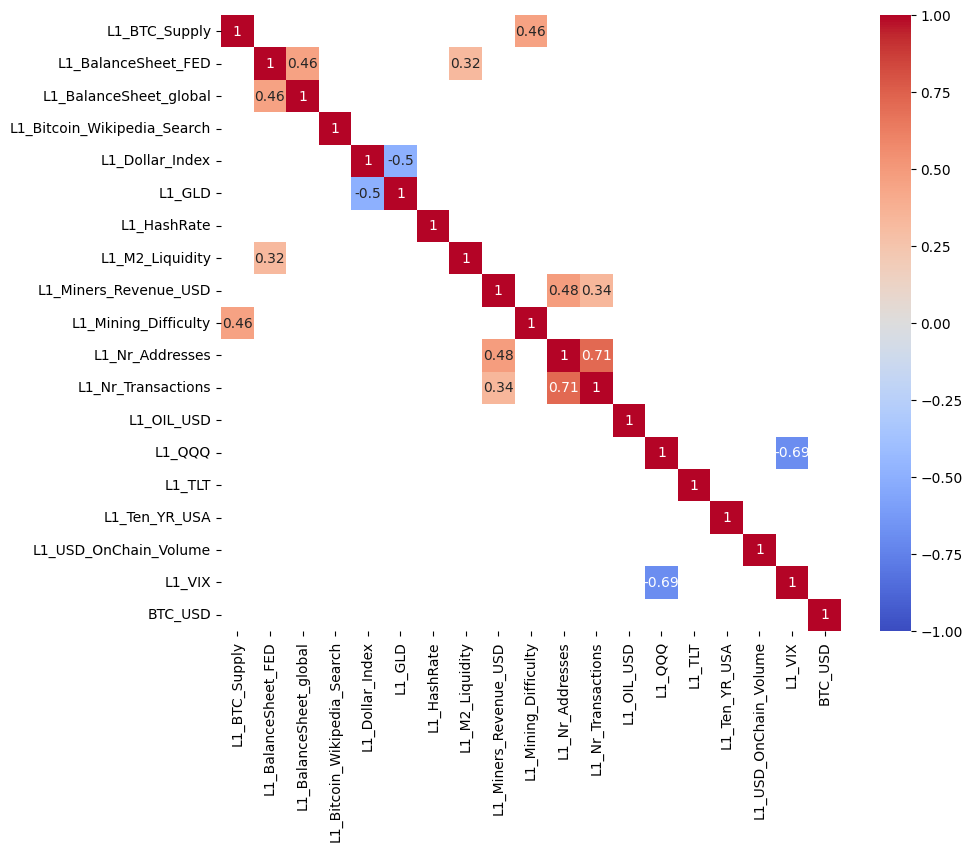

In [88]:
main.correlation_map(df=lagged_df, threshold=0.3)

In [89]:
lagged_df.to_csv(f"df_lagged_weekly.csv", date_format='%Y-%m-%d')

### Linear trend check

In [90]:
import plotly.express as px

def check_linearity(df, dependent_variable):
    for column in df.columns:
        if column != dependent_variable:
            df_pct_ret = df.pct_change().ffill()

            # Fazer scatter plot
            fig = px.scatter(df_pct_ret, x=df[column], y=df[dependent_variable], width=600, height=400, 
                             trendline="ols", trendline_color_override="black", title='OLS trend line')

            fig.update_layout(xaxis=dict(title=column), yaxis = dict(title=dependent_variable), template='seaborn').show()

In [67]:
dependent_variable = "BTC_USD"

check_linearity(lagged_df, dependent_variable)

# Split cycle Dfs

In [3]:
opencsv = pd.read_csv(r"D:\OneDrive - Instituto Politecnico de Castelo Branco\002_Learning\001_Pos_Graduacao\Ciclo 5 - Projeto Final\ProjetoFinal-PosGraduacaoEngenhariaFinanceira\df_lagged_weekly.csv", sep=",")
opencsv.set_index('Date', inplace=True)
opencsv.index = pd.to_datetime(opencsv.index)
opencsv = opencsv.asfreq(pd.infer_freq(opencsv.index))
opencsv = opencsv.astype(float)

In [4]:
opencsv.shape

(4943, 19)

In [92]:
## ciclos
halving12 = "2012-11-28"
halving16 = "2016-07-09"
halving20 = "2020-05-11"
halving24 = "2024-04-19"

ciclo1 = opencsv.loc[:halving12]
ciclo2 = opencsv.loc[halving12:halving16]
ciclo3 = opencsv.loc[halving16:halving20]
ciclo4 = opencsv.loc[halving20:halving24]
ciclo5 = opencsv.loc[halving24:]

In [93]:
# save all cycles df
for i in range(1, 6):  # Loop from 1 to 5 to match your DataFrame names
    df = globals()[f'ciclo{i}']  # Access each DataFrame using its name
    df.to_csv(f"df_ciclo{i}_weekly.csv", date_format='%Y-%m-%d')  # Save each DataFrame with a dynamic filename